# Code first data base serkan polat

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import shap



%matplotlib inline

## I. Data Overview

In [2]:
# Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.read_csv(r'C:\Users\ptrau\OneDrive - University of Sussex\MASTER CLASSES\Data Science Dissertation\Dissertation\HR_comma_sep.csv')


In [3]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [4]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
def count_rows_and_columns(df):
    return df.shape

In [7]:
df.shape

(14999, 10)

In [8]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [9]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [11]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [12]:
# Get the count of each classification in the 'department' column
department_counts = df['department'].value_counts()

print("Count of each classification in the 'department' column:")
print(department_counts)


Count of each classification in the 'department' column:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


In [13]:
filtered_df = df[df['department'].isin(['IT', 'technical'])]

print(filtered_df)

       turnover  satisfaction  evaluation  projectCount  averageMonthlyHours  \
35            1          0.10        0.94             6                  255   
36            1          0.38        0.46             2                  137   
37            1          0.45        0.50             2                  126   
38            1          0.11        0.89             6                  306   
39            1          0.41        0.54             2                  152   
...         ...           ...         ...           ...                  ...   
14985         1          0.91        0.99             5                  254   
14986         1          0.85        0.85             4                  247   
14987         1          0.90        0.70             5                  206   
14988         1          0.46        0.55             2                  145   
14989         1          0.43        0.57             2                  159   

       yearsAtCompany  workAccident  pr

## II. EDA 

In [14]:
### a) stadistical overview

In [15]:
# The dataset contains 10 columns and 14999 observations
filtered_df.shape

(3947, 10)

In [16]:
# Check the type of our features. 
filtered_df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [17]:
#Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = filtered_df.turnover.value_counts() / 14999
turnover_rate

0    0.198480
1    0.064671
Name: turnover, dtype: float64

In [18]:
Turnover_rateIT=filtered_df.turnover.value_counts()/3947

In [19]:
Turnover_rateIT

0    0.754244
1    0.245756
Name: turnover, dtype: float64

In [20]:
# Group by the 'sales' department and calculate the mean of the 'turnover' column
department_turnover = df.groupby('department')['turnover'].mean()

# Convert the turnover rate to percentage
department_turnover_percentage = department_turnover * 100

department_turnover_percentage


department
IT             22.249389
RandD          15.374841
accounting     26.597132
hr             29.093369
management     14.444444
marketing      23.659674
product_mng    21.951220
sales          24.492754
support        24.899058
technical      25.625000
Name: turnover, dtype: float64

In [21]:
# Group the DataFrame by department
grouped = df.groupby('department').agg(total_employees=('turnover', 'size'),
                                  employees_left=('turnover', 'sum'))

# # Calculate the turnover percentage for each department with respect to the total number of employees (14999)
grouped['turnover_percentage_global'] = (grouped['employees_left'] / 14999) * 1000

turnover_percentage_global_by_department = grouped['turnover_percentage_global'].round(2).astype(str) + '%'
turnover_percentage_global_by_department


department
IT              18.2%
RandD           8.07%
accounting      13.6%
hr             14.33%
management      6.07%
marketing      13.53%
product_mng     13.2%
sales           67.6%
support         37.0%
technical      46.47%
Name: turnover_percentage_global, dtype: object

In [22]:
#Looks like the 75% of the IT and tech employees stayed and the 25% of the other left.

In [23]:
filtered_df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000,3947.000000
mean,0.245756,0.611082,0.719772,3.858880,202.409932,3.429187,0.138080,0.007854
std,0.430589,0.252880,0.170651,1.247643,50.618548,1.309732,0.345027,0.088286
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,158.000000,3.000000,0.000000,0.000000
50%,0.000000,0.650000,0.730000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,246.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [24]:
turnover_Summary = filtered_df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.671156,0.715469,3.796103,198.604300,3.265368,0.168962,0.008398
1,0.426711,0.732979,4.051546,214.089691,3.931959,0.043299,0.006186


### b) correlation matrix and Heat map

Moderate Positively Correlated Features:

projectCount vs evaluation: 0.349333
projectCount vs averageMonthlyHours: 0.417211
averageMonthlyHours vs evaluation: 0.339742
Moderate Negatively Correlated Feature:

satisfaction vs turnover: -0.388375
Stop and Think:

What features affect our target variable the most (turnover)?
What features have strong correlations with each other?
Can we do a more in depth examination of these features?
Summary:

From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

Text(0.5, 1.0, 'IT and Tech Correlation Matrix')

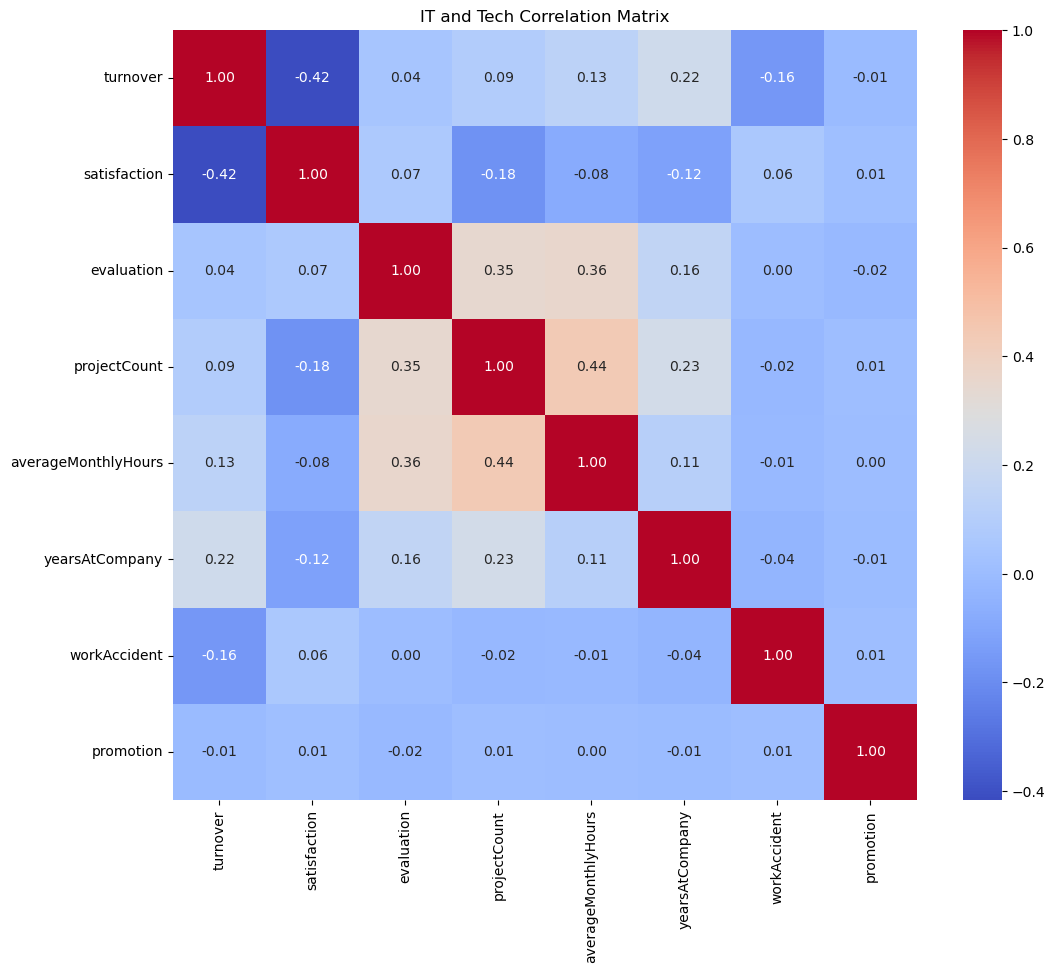

In [25]:
corrtech = filtered_df.corr()

plt.figure(figsize=(12, 10))  # Adjust the figure size
sns.heatmap(corrtech, annot=True, fmt=".2f", cmap='coolwarm',  # Changed color map to 'coolwarm'
            xticklabels=corrtech.columns.values,
            yticklabels=corrtech.columns.values)
plt.title('IT and Tech Correlation Matrix')

### Anova

In [26]:
# ANOVA model
model = ols('turnover ~ department', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table


,sum_sq,df,F,PR(>F)
department,15.750075,9.0,9.696976,6.379416e-15
Residual,2705.057178,14989.0,NaN,NaN


In [27]:
# Results storage
t_test_results = {}

# Perform t-test for each department
for department in df['department'].unique():
    department_data = df[df['department'] == department]['turnover']
    other_data = df[df['department'] != department]['turnover']
    
    t_stat, p_val = ttest_ind(department_data, other_data)
    
    t_test_results[department] = {
        't-statistic': t_stat,
        'p-value': p_val
    }

t_test_df = pd.DataFrame(t_test_results).T

t_test_df

,t-statistic,p-value
sales,1.215302,2.242699e-01
accounting,1.861782,6.265336e-02
hr,3.460786,5.400997e-04
technical,2.459060,1.394133e-02
support,1.310435,1.900686e-01
management,-5.643580,1.695636e-08
IT,-1.337959,1.809302e-01
product_mng,-1.350737,1.768001e-01
marketing,-0.105232,9.161929e-01
RandD,-5.712412,1.134994e-08


In [28]:
# Reset counters for the errors
type_1_errors = 0
type_2_errors = 0

# Define the number of simulations
n_simulations = 10000

#we can set an arbitrary value.
#A common approach is to use a small, medium, or large effect size based on domain knowledge or literature.
#In absence of that, a small value like 0.2 can be used as a starting point.
effect_size = 0.2


# Actual means and standard deviations for each department
it_data = filtered_df[filtered_df['department'] == 'IT']
mean_it = it_data['turnover'].mean()
std_it = it_data['turnover'].std()

technical_data = filtered_df[filtered_df['department'] == 'technical']
mean_technical = technical_data['turnover'].mean()
std_technical = technical_data['turnover'].std()

# Simulate data for Type I Error estimation
for _ in range(n_simulations):
    simulated_it = np.random.normal(mean_it, std_it, len(it_data))
    simulated_technical = np.random.normal(mean_technical, std_technical, len(technical_data))
    
    # Perform ANOVA on simulated data
    f_stat, p_value = f_oneway(simulated_it, simulated_technical)
    
    # Check if we incorrectly reject the null hypothesis
    if p_value < 0.05:
        type_1_errors += 1

# Simulate data for Type II Error estimation
for _ in range(n_simulations):
    simulated_it = np.random.normal(mean_it, std_it, len(it_data))
    simulated_technical = np.random.normal(mean_technical + effect_size, std_technical, len(technical_data))
    
    # Perform ANOVA on simulated data
    f_stat, p_value = f_oneway(simulated_it, simulated_technical)
    
    # Check if we incorrectly fail to reject the null hypothesis
    if p_value >= 0.05:
        type_2_errors += 1

type_1_error_rate = type_1_errors / n_simulations
type_2_error_rate = type_2_errors / n_simulations

type_1_error_rate, type_2_error_rate


(0.6344, 0.0)

In [29]:
it_turnover = filtered_df[filtered_df['department'] == 'IT']['turnover']
technical_turnover = filtered_df[filtered_df['department'] == 'technical']['turnover']

t_stat, p_value = ttest_ind(it_turnover, technical_turnover)

t_stat, p_value


(-2.2808332601131385, 0.022611401385118822)

###  c) Stadistical test correlation
#### One-Sample T-Test (Measuring Satisfaction Level)

A one-sample t-test checks whether a sample mean differs from the population mean. Let's test to see whether the average satisfaction level of employees that had a turnover differs from the entire employee population.

Hypothesis Testing: Is there significant difference in the means of satisfaction level between employees who had a turnover and the entire employee population?

Null Hypothesis: (H0: pTS = pES) The null hypothesis would be that there is no difference in satisfaction level between all employees who did turnover and the entire employee population.

Alternate Hypothesis: (HA: pTS != pES) The alternative hypothesis would be that there is a difference in satisfaction level between all employees who did turnover and the entire employee population

In [30]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee population is: 0.6128335222348166
The mean for the employees that had a turnover is: 0.44009801176140917


#### conducting the T-Test

In [31]:
#Let's conduct a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:

stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean


Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

#### T- test result

The test result shows the test statistic "t" is equal to -39.109. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

#### T-Test Quantile
If the t-statistic value we calculated above (-39.109) is outside the quantiles, then we can reject the null hypothesis

In [32]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


#### One- Sample T-Test summary
T-Test = -39.109 | P-Value = 9.01e-279 | Reject Null Hypothesis
Reject the null hypothesis because:

T-Test score is outside the quantiles
P-value is lower than confidence level of 5%
Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of 9.012e-279 at a 5% confidence level is a good indicator to reject the null hypothesis.

But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.


In [33]:
#_____Now im going to do the same but with the sample of IT

In [34]:
# Let's compare the means of our IT and tech employee turnover against the IT and Tech employee population satisfaction
ITemp_population_satisfaction = filtered_df['satisfaction'].mean()
ITemp_turnover_satisfaction = filtered_df[filtered_df['turnover']==1]['satisfaction'].mean()

print( 'The mean for the IT and tech employee population is: ' + str(ITemp_population_satisfaction) )
print( 'The mean for the IT and tech employees that had a turnover is: ' + str(ITemp_turnover_satisfaction)) 

The mean for the IT and tech employee population is: 0.6110818343045364
The mean for the IT and tech employees that had a turnover is: 0.42671134020618656


#### conducting the t test
Let's conduct a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:


In [35]:
stats.ttest_1samp(a= filtered_df[filtered_df['turnover']==1]['satisfaction'], # Sample of IT and tech Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # IT and tech Employee Population satisfaction mean

Ttest_1sampResult(statistic=-21.11415989305135, pvalue=1.0457782940979818e-81)

The test result shows the test statistic "t" is equal to-21.114. This test statistic tells us how much the sample mean deviates from the null hypothesis.


1.0457 suggests that it is extremely unlikely that you would observe the data you have, assuming the null hypothesis is true. Therefore, you could confidently reject the null hypothesis in favor of the alternative hypothesis.

If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

#### T test quantile

In [36]:
#If the t-statistic value we calculated above (-21.114) is outside the quantiles, then we can reject the null hypothesis

degree_freedom = len(filtered_df[filtered_df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))


The t-distribution left quartile range is: -1.962412627571823
The t-distribution right quartile range is: 1.9624126275718226


#### One -Sample T Test Summary

T-Test = -21.114 | P-Value = 1.045e-81 | Reject Null Hypothesis
Reject the null hypothesis because:

T-Test score is outside the quantiles
P-value is lower than confidence level of 5%
Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of IT and Tech employees who had a turnover. The super low P-value of 1.045e-81 at a 5% confidence level is a good indicator to reject the null hypothesis.

But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.




### d) Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)

*Satisfaction* There's a pronounced peak among employees with both low and high satisfaction levels.

*Evaluation:* A bimodal distribution is apparent, with peaks for employees having low evaluations (below 0.6) and high evaluations (above 0.8).

*Average Monthly Hours:* Another bimodal distribution exists, marked by clusters of employees with either low (below 150) or high (above 250) average monthly hours.

The distributions for evaluations and average monthly hours share similarities.
Employees with fewer average monthly hours received lower evaluations, and the correlation matrix supports this observation with a high correlation value between the two variables.

What could be behind the sharp increase in the number of employees with low satisfaction?
Could employees be categorized based on these traits?
Is there a discernible relationship between evaluations and average monthly hours?


Text(0.5, 1.0, 'IT and Tech Employee Average Monthly Hours Distribution')

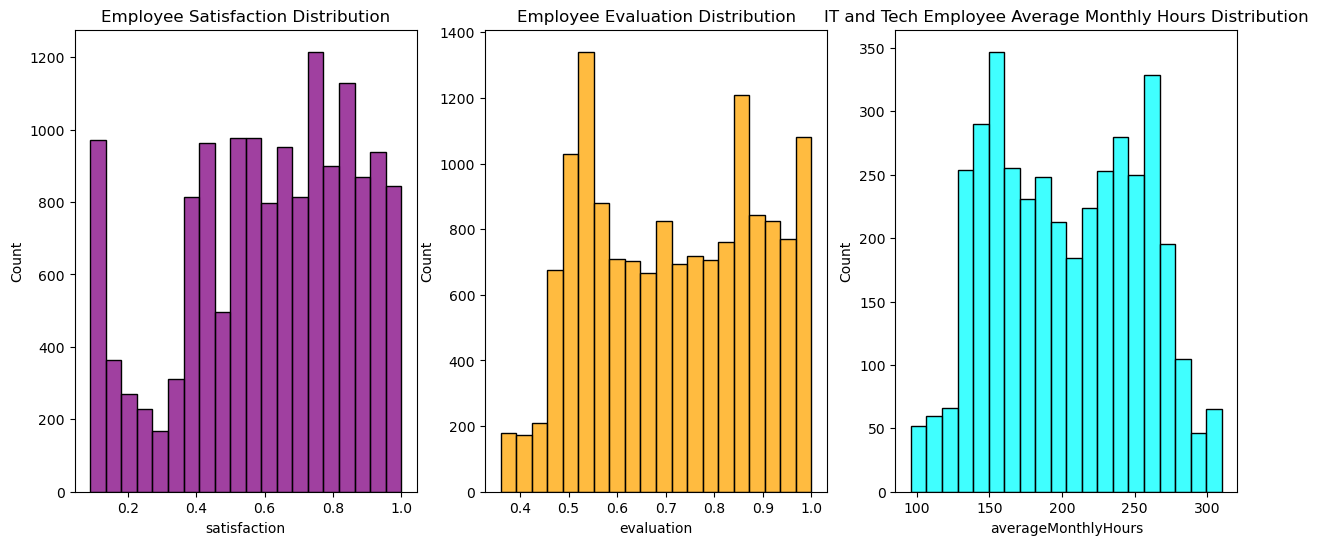

In [105]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
# Graph Employee Satisfaction en morado
sns.histplot(df.satisfaction, kde=False, color="purple", ax=axes[0], bins=20).set_title('Employee Satisfaction Distribution')

# Graph Employee Evaluation en naranja
sns.histplot(df.evaluation, kde=False, color="orange", ax=axes[1], bins=20).set_title('Employee Evaluation Distribution')

# Graph Employee Average Monthly Hours en cyan
sns.histplot(df.averageMonthlyHours, kde=False, color="cyan", ax=axes[2], bins=20).set_title('Employee Average Monthly Hours Distribution')


Text(0.5, 1.0, 'IT & Tech Employee Average Monthly Hours Distribution')

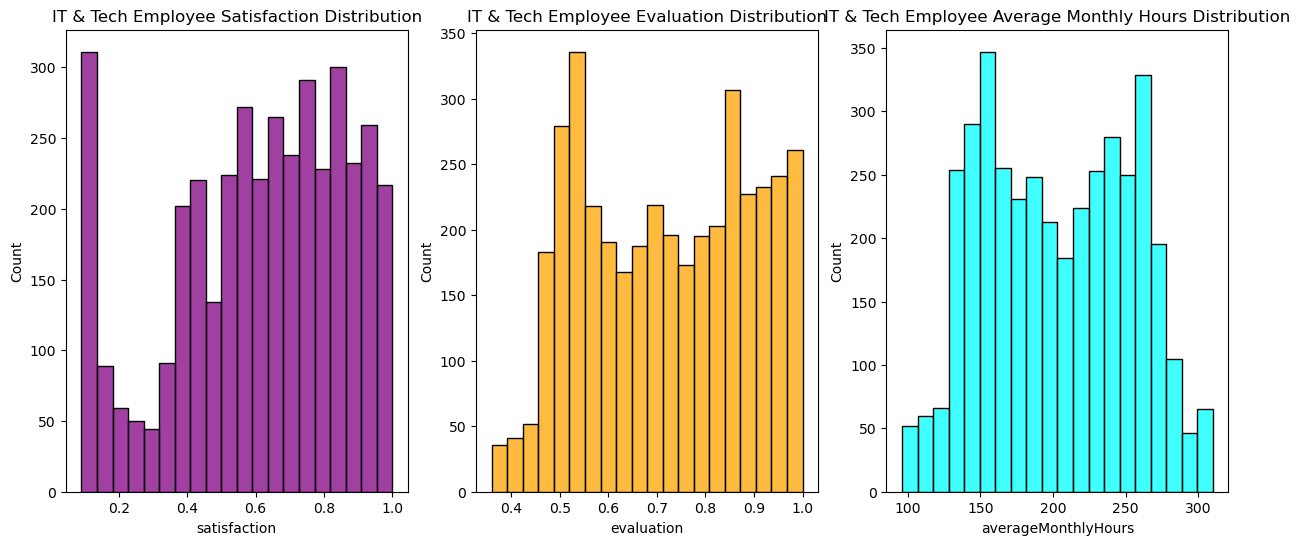

In [38]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
# Graph Employee Satisfaction en morado
sns.histplot(filtered_df.satisfaction, kde=False, color="purple", ax=axes[0], bins=20).set_title('IT & Tech Employee Satisfaction Distribution')

# Graph Employee Evaluation en naranja
sns.histplot(filtered_df.evaluation, kde=False, color="orange", ax=axes[1], bins=20).set_title('IT & Tech Employee Evaluation Distribution')

# Graph Employee Average Monthly Hours en cyan
sns.histplot(filtered_df.averageMonthlyHours, kde=False, color="cyan", ax=axes[2], bins=20).set_title('IT & Tech Employee Average Monthly Hours Distribution')


### salary vs turn over
The Sales, Technical, and Support departments rank highest in terms of employee turnover.
In contrast, the Management department experiences the least amount of turnover.

With more granular data about each department, could we identify more specific reasons for the high turnover rates?

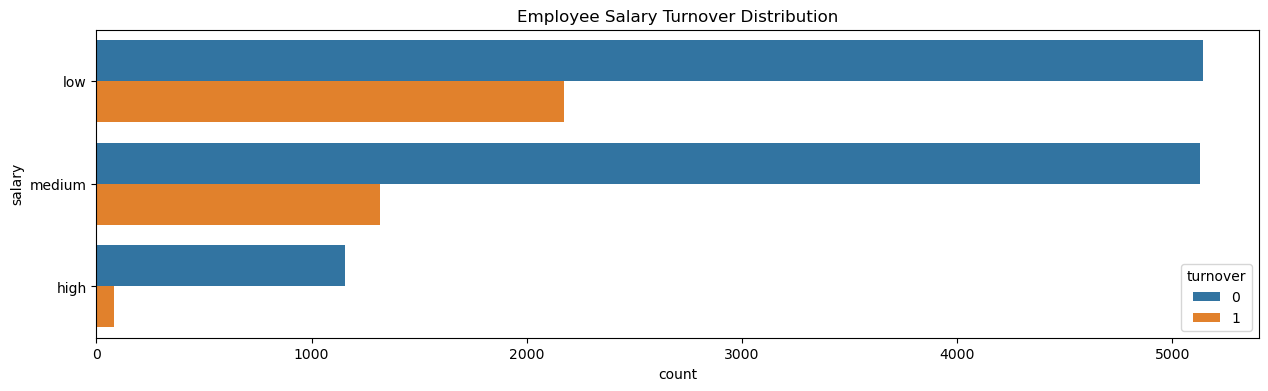

In [39]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

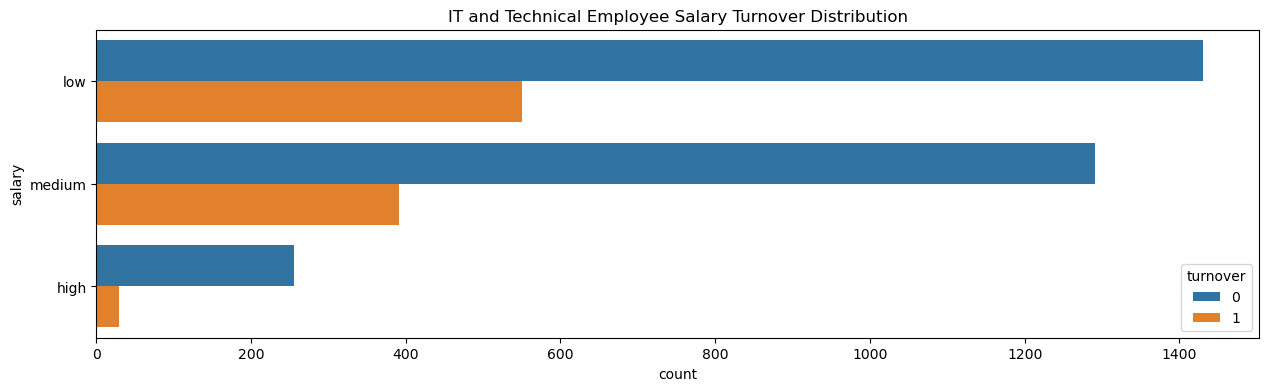

In [40]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=filtered_df).set_title('IT and Technical Employee Salary Turnover Distribution');

###  Department V.S. Turnover

The sales, technical, and support department were the top 3 departments to have employee turnover
The management department had the smallest amount of turnover
Stop and Think:

If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

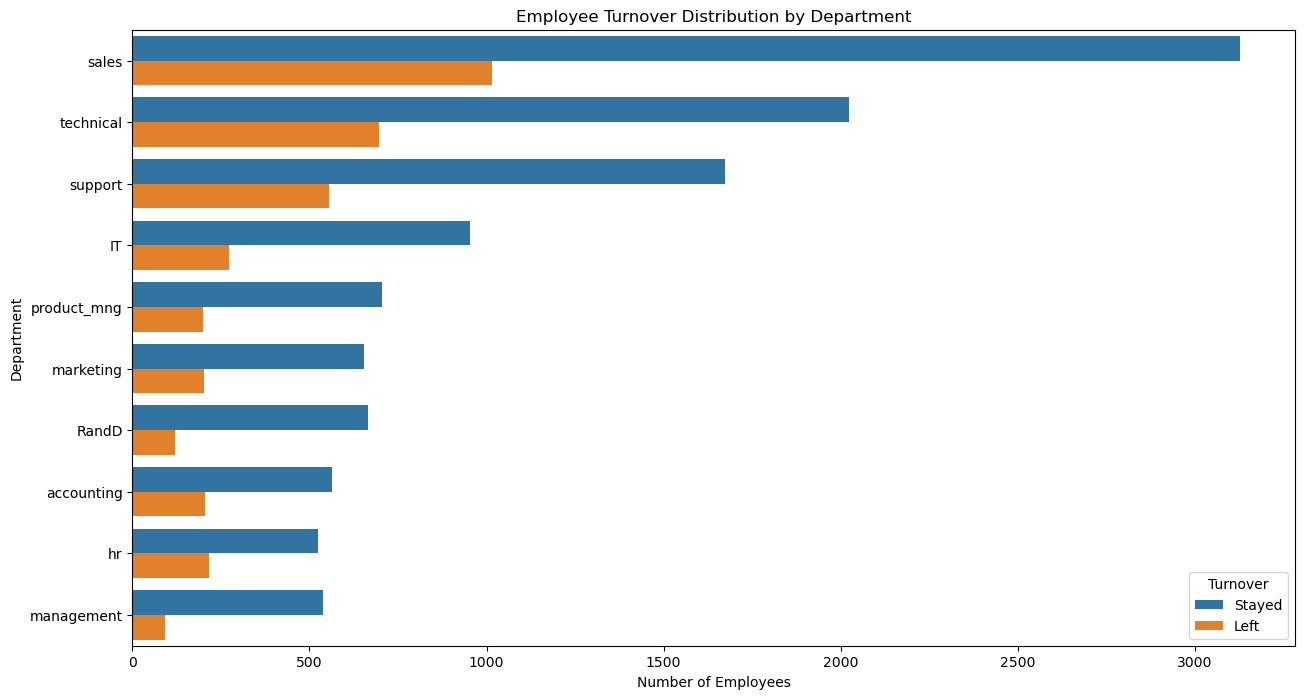

In [41]:
# Rename the 'sales' column to 'department' for clarity
df.rename(columns={'sales': 'department'}, inplace=True)

# Create the visualization comparing turnover across departments again
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y="department", hue='turnover', data=df, order=df['department'].value_counts().index).set_title('Employee Turnover Distribution by Department');
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.legend(title='Turnover', labels=['Stayed', 'Left'])
plt.show()

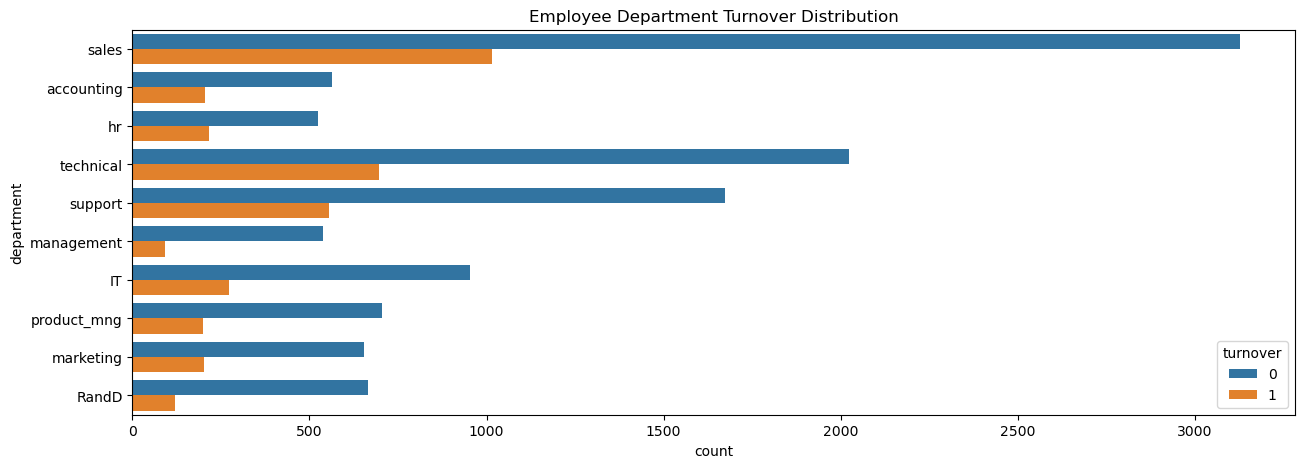

In [42]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

### Turnover vs Project count

A majority of employees handling 2, 6, or 7 projects opted to leave the organization.
On the other hand, most of those who stayed were involved in 3, 4, or 5 projects.
It's noteworthy that every employee with 7 projects left the company.
There is a noticeable uptick in turnover rates as the number of projects increases.
Pause for Thought:

What's driving the exodus at both ends of the project count spectrum?
Could it be that those with 2 or fewer projects are either underutilized or undervalued, leading them to exit?
Are employees juggling more than 6 projects feeling overwhelmed and thus choosing to leave?

[Text(0, 0.5, 'Percent')]

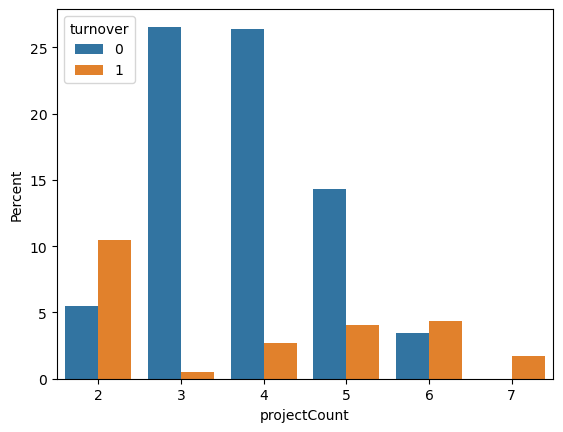

In [43]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

[Text(0, 0.5, 'Percent')]

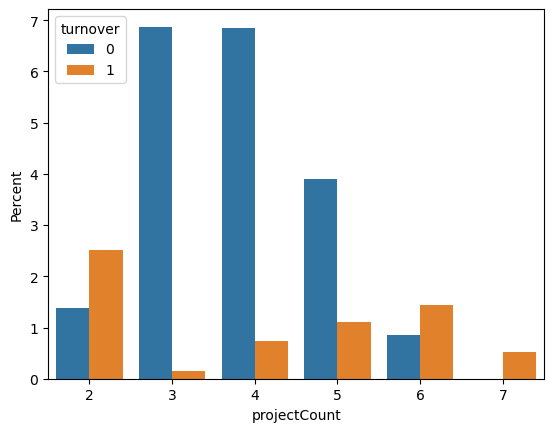

In [44]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=filtered_df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

### Turnover vs Evaluation

A bimodal distribution is noticeable among employees who exited the company.
Employees scoring low on performance metrics are more inclined to leave.
Conversely, high-performing employees also seem to depart more frequently.
The ideal evaluation range for employees who remained with the company falls between 0.6 and 0.8.

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

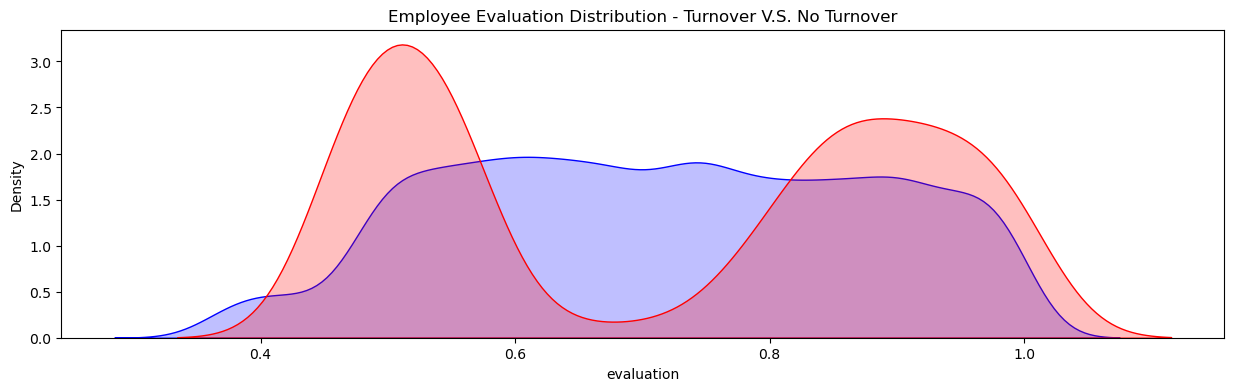

In [45]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')


Text(0.5, 1.0, 'IT Employee Evaluation Distribution - Turnover V.S. No Turnover')

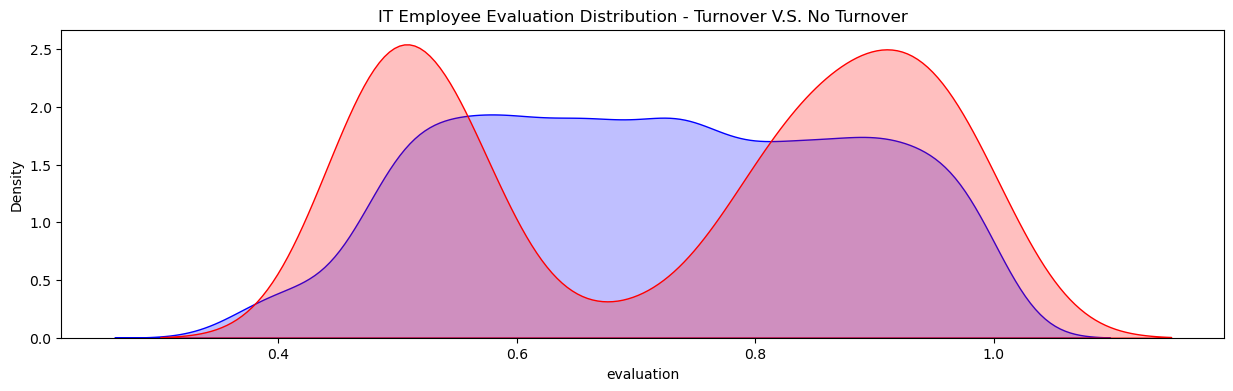

In [46]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(filtered_df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(filtered_df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('IT Employee Evaluation Distribution - Turnover V.S. No Turnover')


### Turnover vs years at company

Over half of the employees with 4 and 5 years of tenure left the organization.
Employees who have been with the company for 5 years warrant closer scrutiny.
Pause and Reflect:

Why do employees predominantly leave between the 3 to 5-year mark?
Who are these departing employees?
Are these employees part-time or contract workers?


### Turnover V.S. Satisfaction

A tri-modal distribution is evident among employees who left the company.
Employees with extremely low levels of satisfaction (0.2 or below) were more likely to depart.
Similarly, those with moderately low satisfaction scores (ranging from 0.3 to 0.5) also had a higher tendency to leave.
Interestingly, even those with high satisfaction levels (0.7 or above) were not immune to leaving the company.

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

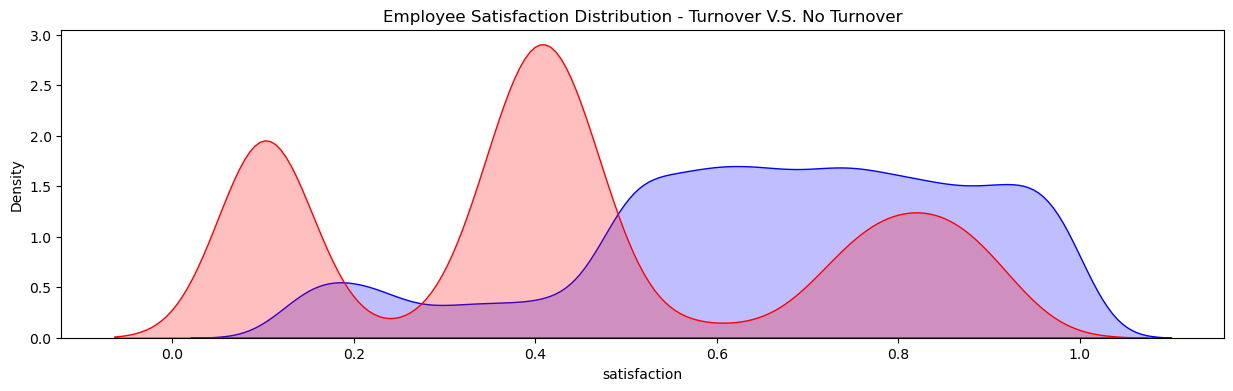

In [47]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')


Text(0.5, 1.0, 'IT Employee Satisfaction Distribution - Turnover V.S. No Turnover')

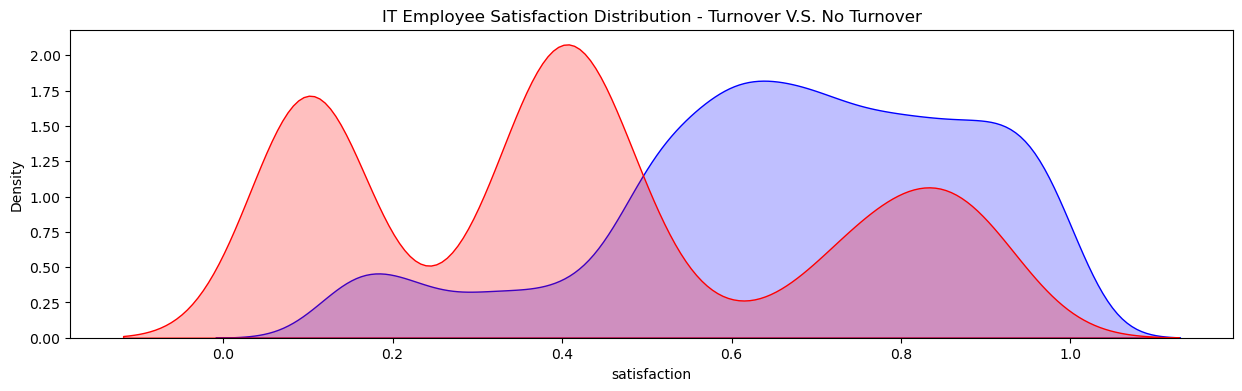

In [48]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(filtered_df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(filtered_df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('IT Employee Satisfaction Distribution - Turnover V.S. No Turnover')


### Project Count vs Average Monthly

As the number of projects went up, so did the average hours worked per month.
One peculiar aspect of the boxplot is the discrepancy in average monthly hours between those who left the company and those who stayed.
It appears that employees who stayed with the company maintained a steady number of average monthly hours, regardless of an uptick in project responsibilities.
On the flip side, those who left the company experienced a rise in their average monthly hours as their project count increased.
Points for Reflection:

What could this data be suggesting?
Why do we see that employees who departed the company logged more hours than those who remained, even when handling the same amount of work?

<AxesSubplot:xlabel='projectCount', ylabel='averageMonthlyHours'>

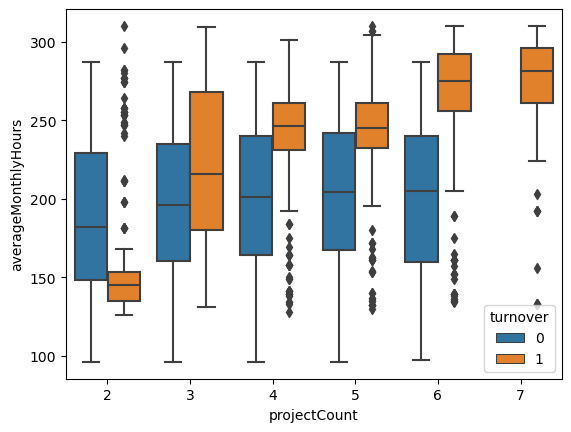

In [49]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=)

<AxesSubplot:xlabel='projectCount', ylabel='averageMonthlyHours'>

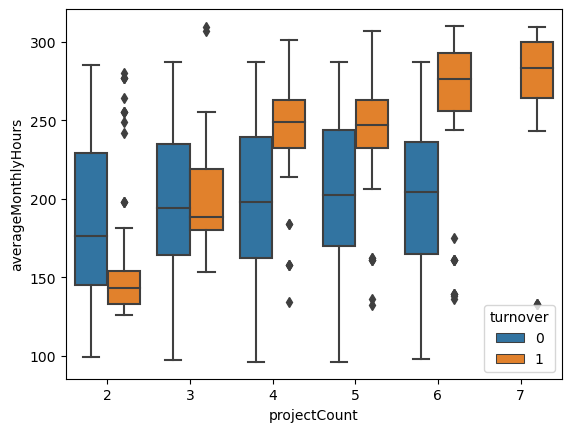

In [50]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=filtered_df)

### Project count vs Evaluation

<AxesSubplot:xlabel='projectCount', ylabel='evaluation'>

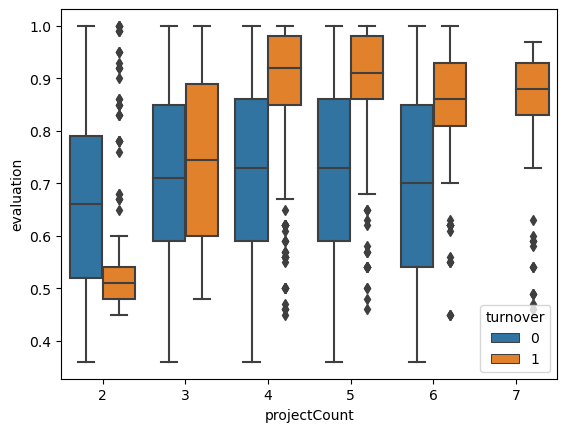

In [51]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left

sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

This graph looks very similar to the graph above. What I find unusual in this graph is with the turnover group. There is an increase in the evaluation score for employees who took on more projects within the turnover group. However, again, for the non-turnover group, employees here had a consistent evaluation score despite the increase in the number of projects.

Questions to Ponder:

Why is it that employees who left had, on average, a higher evaluation than employees who did not leave, even with an increase in the number of projects?
Shouldn't employees with lower evaluations tend to leave the company more frequently?

<AxesSubplot:xlabel='projectCount', ylabel='evaluation'>

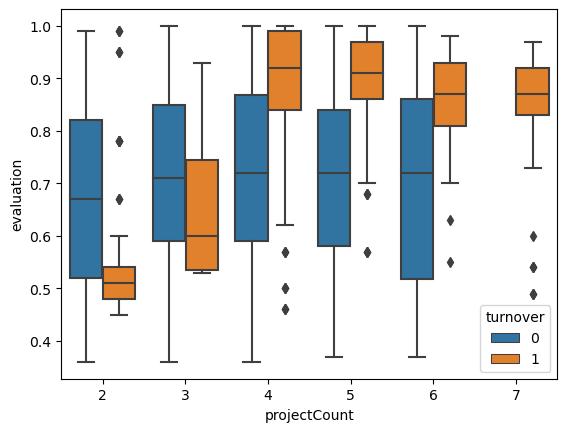

In [52]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left

sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=filtered_df)

### Satisfacion vs evaluation
Group 1 (Dedicated but Unhappy Employee): Satisfaction was below 0.2, while evaluations were above 0.75. This could indicate that employees who left the company were good at their jobs but were unhappy.

Question: What could be the reason for feeling so down when you have a high evaluation? Could it be overwork? Could this group represent employees who are "overburdened"?

Group 2 (Low-Performing and Unhappy Employee): Satisfaction ranged approximately between 0.35 and 0.45, and evaluations were below about 0.58. This could be interpreted as employees who received poor evaluations and felt bad at work.

Question: Could this group represent employees who "underperformed"?

Group 3 (Dedicated and Happy Employee): Satisfaction ranged between 0.7 and 1.0, and evaluations were above 0.8. This could mean that employees in this group were "ideal". They loved their job and received positive evaluations for their performance.

Question: Could this group indicate that employees left because they found another job opportunity?


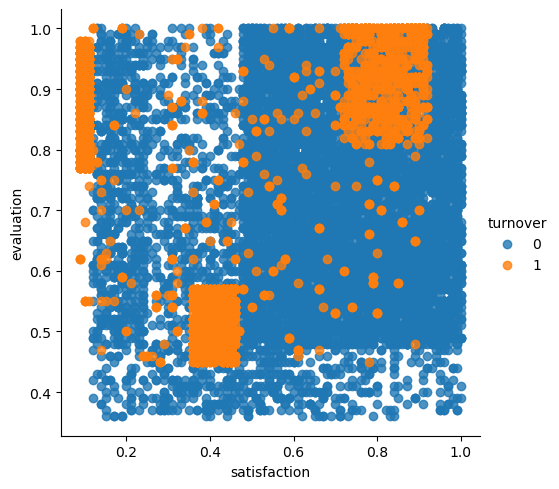

In [53]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

## PCA

In [54]:
# Define X as all columns except the turnover column (and any other columns you want to exclude)
X = filtered_df.drop(columns=['turnover'])


In [55]:
# Define preprocessing for numerical data: scale data
numerical_transformer = StandardScaler()

# Define preprocessing for categorical data: one-hot encode
categorical_transformer = OneHotEncoder(drop='first')

# Identify categorical columns in your data
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Bundle preprocessing for numerical and categorical data into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.select_dtypes(exclude=['object']).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])


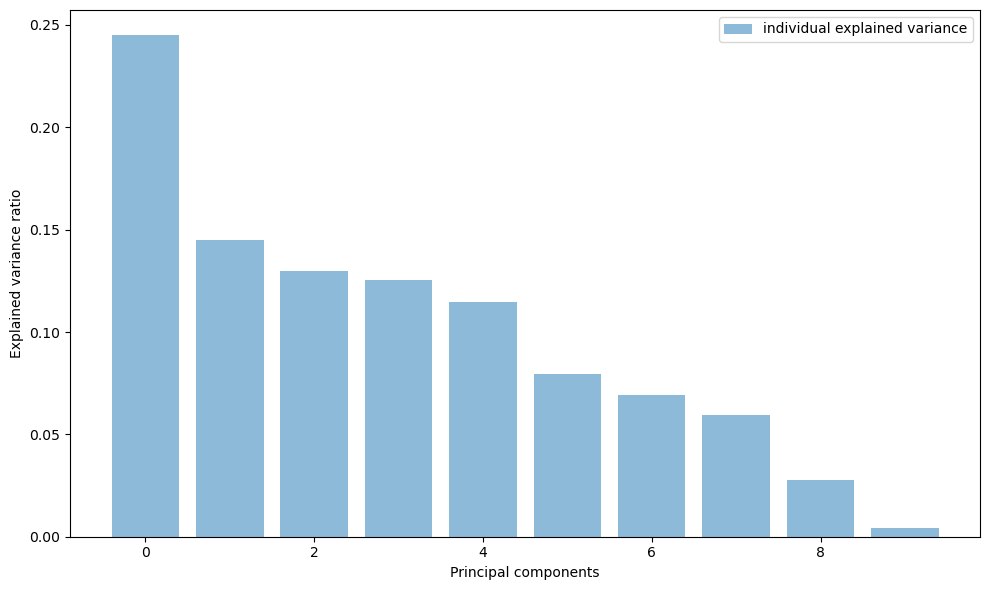

In [56]:
# Preprocess the data using the preprocessor defined earlier
X_preprocessed = preprocessor.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_preprocessed)

# Plot the explained variances
explained_variances = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variances)), explained_variances, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [57]:
cumulative_explained_variance = np.cumsum(explained_variances)
num_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
num_components_95

8

In [58]:
print("Variance explained by each component:", explained_variances)
print("Cumulative explained variance:", cumulative_explained_variance)
print("Number of components to explain 95% of the variance:", num_components_95)


Variance explained by each component: [0.24505848 0.14508878 0.12994618 0.12532186 0.11446273 0.07939239
 0.06942195 0.05933548 0.02765726 0.00431489]
Cumulative explained variance: [0.24505848 0.39014726 0.52009343 0.6454153  0.75987803 0.83927042
 0.90869237 0.96802785 0.99568511 1.        ]
Number of components to explain 95% of the variance: 8


In [59]:
# Step 1: Re-apply PCA specifying 8 components
pca8 = PCA(n_components=8)
X_pca_8 = pca8.fit_transform(X_preprocessed)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


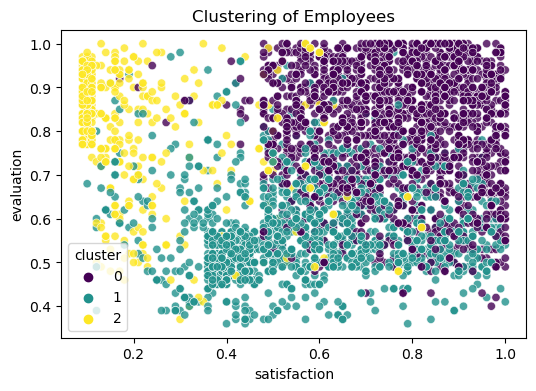

In [60]:
# Define the scaler
scaler = StandardScaler()

# Ensure 'salary' is encoded to 'salary_encoded'
filtered_df['salary_encoded'] = filtered_df['salary'].map({'low': 1, 'medium': 2, 'high': 3})

# Define features for clustering from filtered_df
X_turnover = filtered_df[['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany', 'salary_encoded']]

# Scale the features
X_turnover_scaled = scaler.fit_transform(X_turnover)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
clusters_turnover = kmeans.fit_predict(X_turnover_scaled)

# Add the cluster information to the dataframe using .loc
filtered_df.loc[:, 'cluster'] = clusters_turnover

# Visualize the clusters
plt.figure(figsize=(6,4))
sns.scatterplot(data=filtered_df, x='satisfaction', y='evaluation', hue='cluster', palette='viridis', alpha=0.8)
plt.title('Clustering of Employees')
plt.show()


In [61]:
# Defining the features for clustering
features_for_clustering = ['satisfaction', 'evaluation', 'averageMonthlyHours', 'salary_encoded']

# Extracting the features and scaling
X_for_clustering = filtered_df[features_for_clustering]
X_scaled = scaler.fit_transform(X_for_clustering)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
clusters = kmeans.labels_

# Copy the DataFrame and add the 'cluster' column
filtered_df_copy = filtered_df.copy()
filtered_df_copy['cluster'] = clusters

# Calculate cluster statistics
cluster_stats = filtered_df_copy.groupby('cluster').mean()
cluster_stats


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,salary_encoded
cluster,,,,,,,,,
0,0.145355,0.767060,0.823393,3.881421,219.006557,3.371585,0.149727,0.009290,1.585246
1,0.249377,0.574956,0.567032,3.349751,165.884040,3.264963,0.139027,0.006858,1.596010
2,0.592593,0.167622,0.827700,5.370370,257.411306,4.148148,0.093567,0.005848,1.434698


### K- Means clustering of employee turnover

(NO SE PORQUE LO HIZO AHORA Y NO DESPUES PORQUE ES UN ALGORITMO QUE AGRUPA LAS MEDIAS DEPENDIENDO DE LAS CARACTERISTICAS DE CADA CLUSTER) APARTE ES MUY PARECIDO AL PUNTO SATISFACCION VS EVALUACION

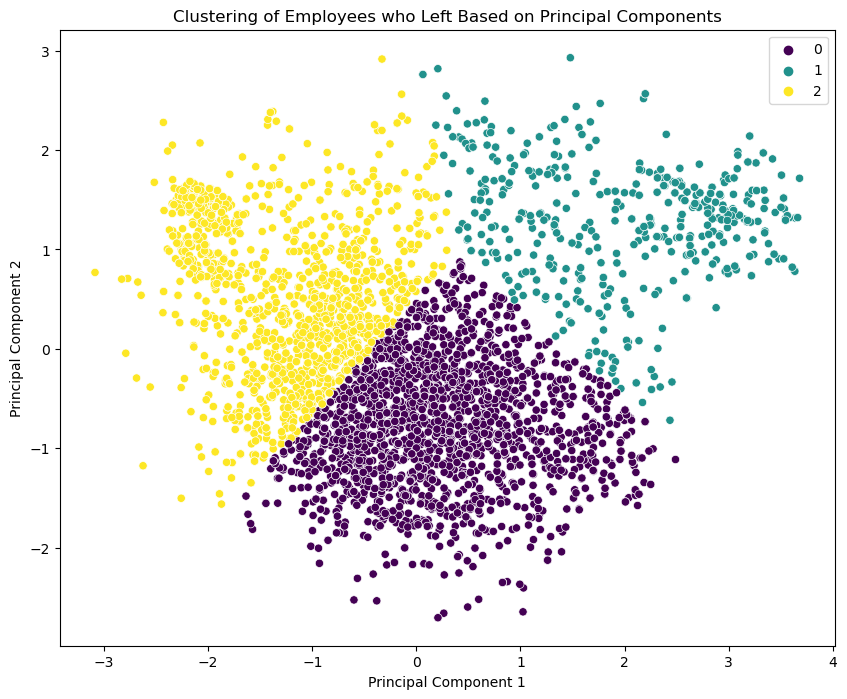

In [62]:
# 1. Principal Component Analysis
pca = PCA(n_components=2)  # using 2 components for visualization
X_pca_turnover = pca.fit_transform(X_turnover_scaled)

# 2. Clustering on Principal Components
kmeans_pca = KMeans(n_clusters=3)  # using 3 clusters as an example
clusters_pca_turnover = kmeans_pca.fit_predict(X_pca_turnover)

# 3. Visualize the Clusters
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca_turnover[:, 0], y=X_pca_turnover[:, 1], hue=clusters_pca_turnover, palette='viridis')
plt.title('Clustering of Employees who Left Based on Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Data preparation for modeling

In [63]:
filtered_df_copy = filtered_df_copy.drop(columns=['cluster', 'salary'])

filtered_df_copy.rename(columns={'salary_encoded': 'salary_ordinal'}, inplace=True)



In [64]:
print(filtered_df_copy.columns)


Index(['turnover', 'satisfaction', 'evaluation', 'projectCount',
       'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion',
       'department', 'salary_ordinal'],
      dtype='object')


In [65]:
# Define the preprocessor for numeric features
numeric_transformer = StandardScaler()

# Define the preprocessor for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define categorical and numeric columns
categorical_columns = ['department']
numeric_columns = ['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany', 'workAccident', 'promotion', 'salary_ordinal']

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    n_jobs=1  # Set n_jobs to 1 for serial execution
)

# Fit the preprocessor to the data
preprocessor.fit(filtered_df_copy)

# Apply the preprocessor only to the selected columns
X_preprocessed_filtered = preprocessor.transform(filtered_df_copy)



In [66]:
# Define X as all columns except the turnover column (and any other columns you want to exclude)
X = filtered_df_copy.drop(columns=['turnover'])


In [67]:
#  Apply the preprocessor and fit the preprocessor model to the data
X_preprocessed = preprocessor.fit_transform(X)
y = filtered_df_copy['turnover']  # 'turnover' column containing the class labels

# Create a PCA model and fit the preprocessed data to it
pca = PCA(n_components=8)  # Specify the number of components you wish to retain
X_pca = pca.fit_transform(X_preprocessed)

# Split the PCA-transformed data into training and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train_pca.shape, X_test_pca.shape

((3157, 8), (790, 8))

### RANDOM F- LOGISTIC REGRESSION-DECISION T

In [68]:
# Create the models
logreg_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Train the models on the training set
logreg_model.fit(X_train_pca, y_train)
decision_tree_model.fit(X_train_pca, y_train)
random_forest_model.fit(X_train_pca, y_train)

# Predict the labels on the test set
y_pred_logreg = logreg_model.predict(X_test_pca)
y_pred_decision_tree = decision_tree_model.predict(X_test_pca)
y_pred_random_forest = random_forest_model.predict(X_test_pca)

# Calculate the accuracy of each model on the test set
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# Print the accuracies of the models
print(f'Accuracy of Logistic Regression: {accuracy_logreg:.2f}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree:.2f}')
print(f'Accuracy of Random Forest: {accuracy_random_forest:.2f}')


Accuracy of Logistic Regression: 0.77
Accuracy of Decision Tree: 0.97
Accuracy of Random Forest: 0.98


### RANDOM FOREST

In [69]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the data
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train_pca, y_train)

# Predict on test data
y_pred = best_rf_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_rep)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9835443037974684
ROC AUC Score: 0.9719630401304465
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       581
           1       0.99      0.95      0.97       209

    accuracy                           0.98       790
   macro avg       0.99      0.97      0.98       790
weighted avg       0.98      0.98      0.98       790



### Decision tree

In [70]:
# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters and their possible values
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search_tree = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the data
grid_search_tree.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params_tree = grid_search_tree.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_tree)

# Train the model with the best hyperparameters
best_dt_classifier = grid_search_tree.best_estimator_
best_dt_classifier.fit(X_train_pca, y_train)

# Predict on the test data
y_pred_tree = best_dt_classifier.predict(X_test_pca)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

print("Accuracy for Decision Tree:", accuracy_tree)
print("ROC AUC Score for Decision Tree:", roc_auc_tree)
print("Classification Report for Decision Tree:\n", classification_rep_tree)



Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy for Decision Tree: 0.9632911392405064
ROC AUC Score for Decision Tree: 0.9520666397648009
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       581
           1       0.93      0.93      0.93       209

    accuracy                           0.96       790
   macro avg       0.95      0.95      0.95       790
weighted avg       0.96      0.96      0.96       790



In [71]:
# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the data
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_dt_classifier = grid_search.best_estimator_
best_dt_classifier.fit(X_train_pca, y_train)

# Predict on test data
y_pred = best_dt_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_rep)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.9632911392405064
ROC AUC Score: 0.9520666397648009
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       581
           1       0.93      0.93      0.93       209

    accuracy                           0.96       790
   macro avg       0.95      0.95      0.95       790
weighted avg       0.96      0.96      0.96       790



### LOGISTIC REGRESSION

In [72]:
# Instantiate the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Define hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search on the data
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_logreg_classifier = grid_search.best_estimator_
best_logreg_classifier.fit(X_train_pca, y_train)

# Predict on test data
y_pred = best_logreg_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.7759493670886076
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       581
           1       0.67      0.30      0.41       209

    accuracy                           0.78       790
   macro avg       0.73      0.62      0.64       790
weighted avg       0.76      0.78      0.74       790



In [73]:
# Initial data for the table
initial_data = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Best Hyperparameters": [
        "{'C': 0.01, 'penalty': 'l2'}",
        "{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}",
        "{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}"
    ],
    "Accuracy": [0.7747, 0.9658, 0.9772],
    "ROC AUC Score": [0.625, 0.96, 0.965],
    "Precision (Class 0)": [0.79, 0.98, 0.98],
    "Precision (Class 1)": [0.67, 0.93, 0.97],
    "Recall (Class 0)": [0.95, 0.97, 0.99],
    "Recall (Class 1)": [0.30, 0.95, 0.94],
    "F1-Score (Class 0)": [0.86, 0.98, 0.98],
    "F1-Score (Class 1)": [0.41, 0.94, 0.96]
}

# Create initial DataFrame
results_df = pd.DataFrame(initial_data)

# New data to be updated
new_data = {
    "Model": ["Decision Tree", "Random Forest"],
    "Best Hyperparameters": [
        "{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}",
        "{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}"
    ],
    "Accuracy": [0.9633, 0.9835],
    "ROC AUC Score": [0.9521, 0.9720],
    "Precision (Class 0)": [0.97, 0.98],
    "Precision (Class 1)": [0.93, 0.99],
    "Recall (Class 0)": [0.98, 1.00],
    "Recall (Class 1)": [0.93, 0.95],
    "F1-Score (Class 0)": [0.98, 0.99],
    "F1-Score (Class 1)": [0.93, 0.97]
}

# Create a new DataFrame for the updated results
new_results_df = pd.DataFrame(new_data)

# Combine the existing DataFrame with the new one, while keeping the Logistic Regression row
updated_results_df = pd.concat([results_df[results_df['Model'] == 'Logistic Regression'], new_results_df]).reset_index(drop=True)
updated_results_df

,Model,Best Hyperparameters,Accuracy,ROC AUC Score,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-Score (Class 0),F1-Score (Class 1)
0,Logistic Regression,"{'C': 0.01, 'penalty': 'l2'}",0.7747,0.6250,0.79,0.67,0.95,0.30,0.86,0.41
1,Decision Tree,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.9633,0.9521,0.97,0.93,0.98,0.93,0.98,0.93
2,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.9835,0.9720,0.98,0.99,1.00,0.95,0.99,0.97


In [74]:
# Train Logistic Regression
logreg_classifier.fit(X_train_pca, y_train)

# Train Decision Tree
dt_classifier.fit(X_train_pca, y_train)

# Train Random Forest
rf_classifier.fit(X_train_pca, y_train)

# Once they are trained, you can then predict on the test set
logreg_preds = logreg_classifier.predict(X_test_pca)
dt_preds = dt_classifier.predict(X_test_pca)
rf_preds = rf_classifier.predict(X_test_pca)



In [75]:
predictions_df = pd.DataFrame({
    "Logistic Regression": logreg_preds,
    "Decision Tree": dt_preds,
    "Random Forest": rf_preds
})


In [76]:
correlation_matrix = predictions_df.corr()
print(correlation_matrix)


                     Logistic Regression  Decision Tree  Random Forest
Logistic Regression             1.000000       0.305920       0.296647
Decision Tree                   0.305920       1.000000       0.951307
Random Forest                   0.296647       0.951307       1.000000


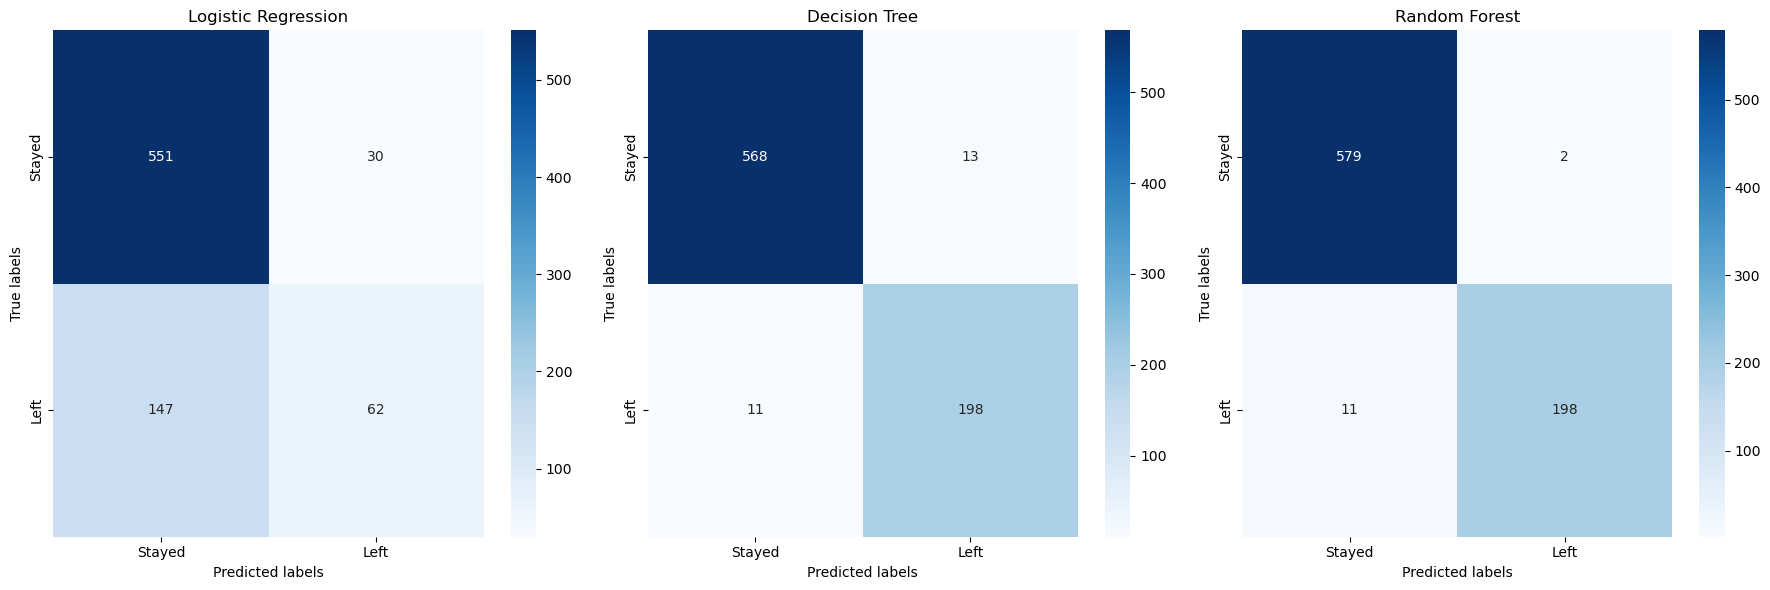

In [77]:
# Train the models with the data
logreg_classifier = LogisticRegression(C=0.01, penalty='l2', random_state=42)
logreg_classifier.fit(X_train_pca, y_train)

dt_classifier = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_classifier.fit(X_train_pca, y_train)

rf_classifier = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Predictions for each model
logreg_preds = logreg_classifier.predict(X_test_pca)
dt_preds = dt_classifier.predict(X_test_pca)
rf_preds = rf_classifier.predict(X_test_pca)

# Confusion matrices
logreg_confusion = confusion_matrix(y_test, logreg_preds)
dt_confusion = confusion_matrix(y_test, dt_preds)
rf_confusion = confusion_matrix(y_test, rf_preds)

def plot_confusion_matrix_side_by_side(confusion, title, ax):
    """
    Plot a confusion matrix side by side.
    """
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['Stayed', 'Left'])
    ax.yaxis.set_ticklabels(['Stayed', 'Left'])

# Plotting the confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_confusion_matrix_side_by_side(logreg_confusion, 'Logistic Regression', axes[0])
plot_confusion_matrix_side_by_side(dt_confusion, 'Decision Tree', axes[1])
plot_confusion_matrix_side_by_side(rf_confusion, 'Random Forest', axes[2])
plt.tight_layout()
plt.show()




In [78]:
### Train our new model

In [79]:
# Instanciate the  model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# train our modelo
rf_classifier.fit(X_train_pca, y_train)




RandomForestClassifier(random_state=42)

In [80]:
#prediction with the x test
y_pred = rf_classifier.predict(X_test_pca)

### variable importance Analysis using ramdom forest

In [81]:
importances = rf_classifier.feature_importances_


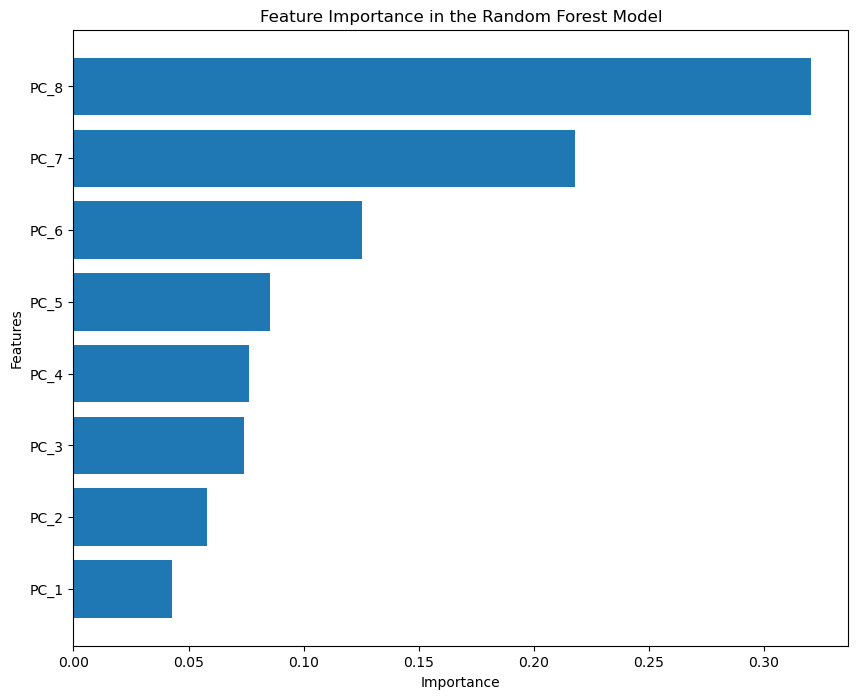

In [82]:
# Get the feature importances
feature_importances = rf_classifier.feature_importances_

# Get the names of the features (in this case, we will use the column names after PCA transformation)
feature_names = [f'PC_{i}' for i in range(1, X_train_pca.shape[1] + 1)]

# Sort features by importance
sorted_idx = feature_importances.argsort()

# Visualize the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_names, feature_importances[sorted_idx])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in the Random Forest Model")
plt.show()


In [83]:
# Create an explainer object using the Random Forest model
explainer = shap.TreeExplainer(rf_classifier)

# Calculate the SHAP values for a dataset (we'll use the test set for this example)
shap_values = explainer.shap_values(X_test_pca)

# Visualize the SHAP values for a specific observation
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test_pca[0], feature_names=feature_names)


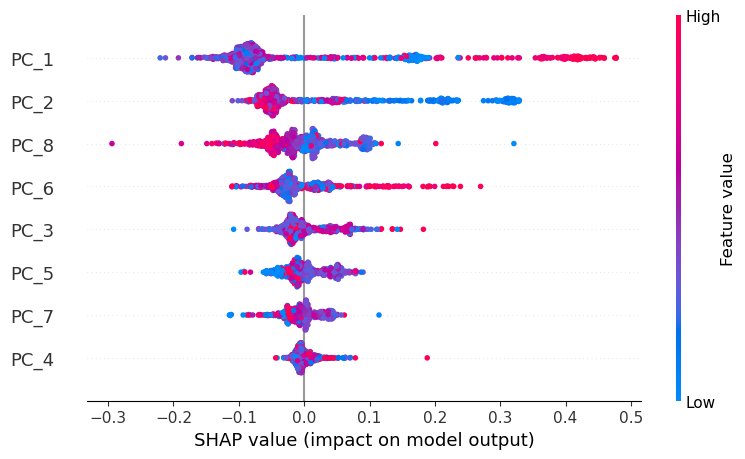

In [84]:
# Create an explainer object using the Random Forest model
explainer = shap.TreeExplainer(rf_classifier)

# Calculate the SHAP values for the test set
shap_values = explainer.shap_values(X_test_pca)

# Visualize the summary plot
shap.summary_plot(shap_values[1], X_test_pca, feature_names=feature_names)


## Testing predictions

In [85]:
# 1. Load the CSV file
hr_data = pd.read_csv(r"C:\Users\ptrau\OneDrive - University of Sussex\MASTER CLASSES\Data Science Dissertation\Dissertation\HRcommaCopy.csv")

# Display the first rows of the dataframe to verify the content
hr_data.head()




,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [86]:
# 2. Change the column names as specified
column_mapping = {
    'satisfaction_level': 'satisfaction',
    'last_evaluation': 'evaluation',
    'number_project': 'projectCount',
    'average_montly_hours': 'averageMonthlyHours',
    'time_spend_company': 'yearsAtCompany',
    'Work_accident': 'workAccident',
    'promotion_last_5years': 'promotion',
    'sales': 'department',
    'salary': 'salary_ordinal',
    'left': 'turnover'
}

# Rename columns in the hr_data DataFrame
hr_data.rename(columns=column_mapping, inplace=True)

# Display the first rows of the dataframe to verify the changes
print(hr_data.head())

# Display the first rows of the dataframe to verify the changes
hr_data.head()


   satisfaction  evaluation  projectCount  averageMonthlyHours  \
0          0.38        0.53             2                  157   
1          0.80        0.86             5                  262   
2          0.11        0.88             7                  272   
3          0.72        0.87             5                  223   
4          0.37        0.52             2                  159   

   yearsAtCompany  workAccident  turnover  promotion department salary_ordinal  
0               3             0         1          0      sales            low  
1               6             0         1          0      sales         medium  
2               4             0         1          0      sales         medium  
3               5             0         1          0      sales            low  
4               3             0         1          0      sales            low  


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary_ordinal
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [87]:
# Filter the dataset to include only rows where the department is 'IT' or 'technical'
filtered_hr_data = hr_data[(hr_data['department'] == 'IT') | (hr_data['department'] == 'technical')]

# Create an inverse mapping to change categorical values to numerical ones
inverse_mapping = {'low': 1, 'medium': 2, 'high': 3}

# Apply the inverse mapping to the 'salary_ordinal' column
filtered_hr_data['salary_ordinal'] = filtered_hr_data['salary_ordinal'].map(inverse_mapping)

# Display the first rows of the dataframe to verify the changes
filtered_hr_data.head()



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary_ordinal
35,0.10,0.94,6,255,4,0,1,0,technical,1
36,0.38,0.46,2,137,3,0,1,0,technical,1
37,0.45,0.50,2,126,3,0,1,0,technical,1
38,0.11,0.89,6,306,4,0,1,0,technical,1
39,0.41,0.54,2,152,3,0,1,0,technical,1


In [88]:
filtered_hr_data = filtered_hr_data[filtered_hr_data['department'].isin(['technical', 'IT'])].copy()

# Check if the 'predicted_turnover' column already exists
if 'predicted_turnover' in filtered_hr_data.columns:
    print("Unique values before any assignment:", filtered_hr_data['predicted_turnover'].unique())

# Preprocessing
categorical_cols = [cname for cname in filtered_hr_data.columns if filtered_hr_data[cname].dtype == "object" and cname != "salary" and cname != "predicted_turnover"]
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
preprocessor_adjusted = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, filtered_hr_data.select_dtypes(exclude=['object']).columns),
        ('cat', categorical_transformer, categorical_cols)
    ])
X_preprocessed = preprocessor_adjusted.fit_transform(filtered_hr_data)

# PCA with 8 components
pca8_adjusted = PCA(n_components=8)
X_pca8 = pca8_adjusted.fit_transform(X_preprocessed)

# Known optimal hyperparameters
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

# Assume that best_rf_classifier is already trained
predicted_turnover_all_data = best_rf_classifier.predict(X_pca8)

# See unique values in predictions to ensure they are only 0 and 1
print("Unique predictions:", set(predicted_turnover_all_data))

# Add the predictions to the dataframe
filtered_hr_data['predicted_turnover'] = predicted_turnover_all_data

# Check unique values immediately after assignment
print("Unique values immediately after assignment:",filtered_hr_data['predicted_turnover'].unique())

# Change 0 and 1 to more descriptive labels
filtered_hr_data['predicted_turnover'] = filtered_hr_data['predicted_turnover'].map({
    0: 'Will Stay',
    1: 'Will Leave'
})

# Check unique values after mapping
print("Unique values after mapping:", filtered_hr_data['predicted_turnover'].unique())

# Save the modified DataFrame to an Excel file
file_path = r"C:\Users\ptrau\OneDrive - University of Sussex\MASTER CLASSES\Data Science Dissertation\Dissertation\turnover_predictions.xlsx"
filtered_hr_data.to_excel(file_path, index=False)


Unique predictions: {0, 1}
Unique values immediately after assignment: [0 1]
Unique values after mapping: ['Will Stay' 'Will Leave']


In [89]:
if 'predicted_turnover' in filtered_hr_data.columns:
    print("Unique values before assignment:", filtered_hr_data['predicted_turnover'].unique())


Unique values before assignment: ['Will Stay' 'Will Leave']


In [90]:
print(filtered_hr_data['predicted_turnover'].unique())  # Si la columna ya existe


['Will Stay' 'Will Leave']



- **0**: This value suggests that the model predicts the employee will not leave the company. In other words, this employee is not expected to have turnover.
  
- **1**: This value indicates that the model predicts the employee will leave the company. In other words, this employee is expected to have turnover.

In [91]:
print(filtered_hr_data[filtered_hr_data['predicted_turnover'] == 2])


Empty DataFrame
Columns: [satisfaction, evaluation, projectCount, averageMonthlyHours, yearsAtCompany, workAccident, turnover, promotion, department, salary_ordinal, predicted_turnover]
Index: []


## WITHOUT PCA

In [92]:
filtered_hr_data

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary_ordinal,predicted_turnover
35,0.10,0.94,6,255,4,0,1,0,technical,1,Will Stay
36,0.38,0.46,2,137,3,0,1,0,technical,1,Will Stay
37,0.45,0.50,2,126,3,0,1,0,technical,1,Will Stay
38,0.11,0.89,6,306,4,0,1,0,technical,1,Will Leave
39,0.41,0.54,2,152,3,0,1,0,technical,1,Will Stay
...,...,...,...,...,...,...,...,...,...,...,...
14985,0.91,0.99,5,254,5,0,1,0,technical,2,Will Stay
14986,0.85,0.85,4,247,6,0,1,0,technical,1,Will Leave
14987,0.90,0.70,5,206,4,0,1,0,technical,1,Will Stay
14988,0.46,0.55,2,145,3,0,1,0,technical,1,Will Stay


In [93]:
df_copy = filtered_hr_data.copy()


In [94]:
df_copy.drop(columns=['predicted_turnover'], inplace=True)

In [95]:
# Create X e y
X = df_copy.drop(columns=['turnover'])
y =df_copy['turnover']


In [96]:
print("filtered_hr_data columns: ",df_copy.columns)


filtered_hr_data columns:  Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'turnover', 'promotion', 'department',
       'salary_ordinal'],
      dtype='object')


In [97]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
# Identify categorical columns in the data
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Apply the preprocessor to the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)



In [99]:
# Create a new Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_preprocessed, y_train)

# Make predictions on the training and test sets
y_pred_train = rf_classifier.predict(X_train_preprocessed)
y_pred_test = rf_classifier.predict(X_test_preprocessed)

# Evaluate the model performance
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy on the training set: {accuracy_train}")
print(f"Accuracy on the test set: {accuracy_test}")


Accuracy on the training set: 1.0
Accuracy on the test set: 0.9860759493670886


In [100]:
# Ensure that all necessary columns are present
print(df_copy.columns)

# Create X and y
X = df_copy.drop(columns=['turnover'])  # Make sure 'turnover' is in the original DataFrame
y = df_copy['turnover']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessor
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train the model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_preprocessed, y_train)

# Evaluate the model
y_pred_test = rf_classifier.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}")



Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'turnover', 'promotion', 'department',
       'salary_ordinal'],
      dtype='object')
Accuracy: 0.9860759493670886


In [101]:
# Fit the preprocessor to the dataset
preprocessor.fit(X)

# Get the names of the numerical columns (which remain the same)
num_feature_names = np.array(preprocessor.named_transformers_['num'].get_feature_names_out())

# Get the names of the new columns for the categorical features
cat_feature_names = np.array(preprocessor.named_transformers_['cat'].get_feature_names_out())

# Combine the feature names
new_feature_names = np.concatenate([num_feature_names, cat_feature_names])


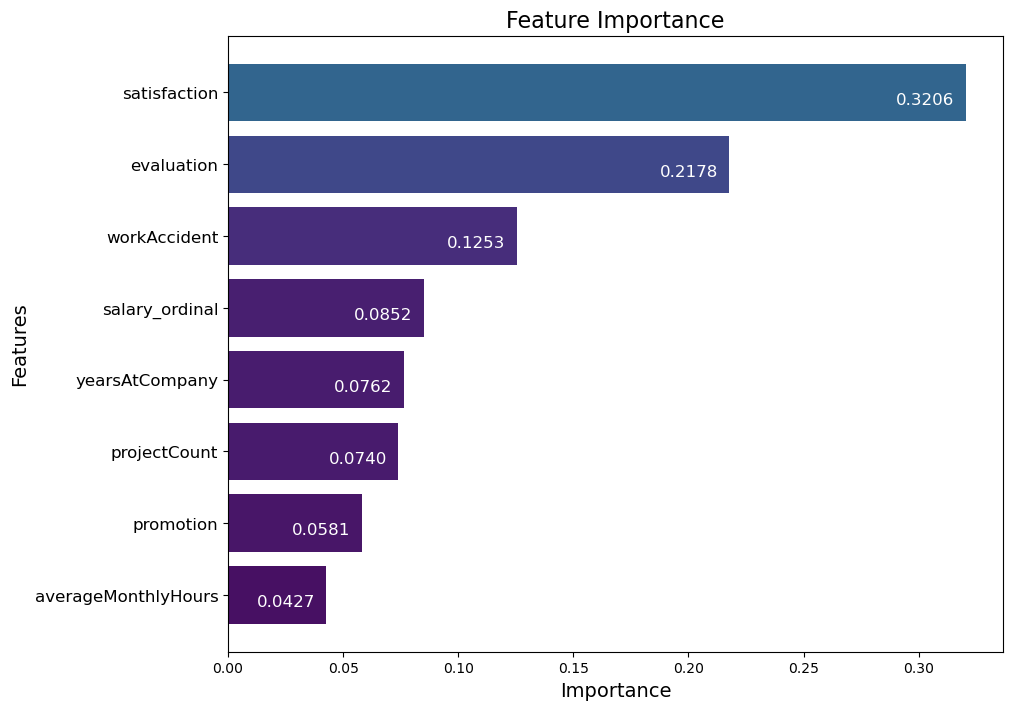

In [102]:
# Ensure that 'salary_ordinal' is included in the categorical features
categorical_cols.append('salary_ordinal')

# Get the exact name of the 'salary_ordinal' column
exact_column_name = categorical_cols[-1]

# Add the name to the new_feature_names array
new_feature_names = np.concatenate([num_feature_names, cat_feature_names, [exact_column_name]])

# Sort the importances and align with the feature names
sorted_idx = np.argsort(feature_importances)
sorted_feature_names = new_feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Create a horizontal bar chart to display feature importance
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(sorted_idx)), sorted_importances, align='center', color=plt.cm.viridis(sorted_importances))

# Add axis labels and title
plt.yticks(range(len(sorted_idx)), sorted_feature_names, fontsize=12)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance', fontsize=16)

# Add annotations with importance values
for bar in bars:
    plt.text(bar.get_width() - 0.005, bar.get_y() + bar.get_height()/2 - 0.1, f'{bar.get_width():.4f}', va='center', ha='right', color='white', fontsize=12)

# Show the chart
plt.show()




In [103]:
# Preprocesar todo el conjunto de datos
X_all_preprocessed = preprocessor.transform(filtered_hr_data)

# Hacer predicciones en todo el conjunto de datos
y_pred_all = rf_classifier.predict(X_all_preprocessed)

# Añadir las predicciones al DataFrame
df_copy['predicted_turnoverwithoutpca'] = y_pred_all

# Guardar el DataFrame en un archivo Excel
output_path = r"C:\Users\ptrau\OneDrive - University of Sussex\MASTER CLASSES\Data Science Dissertation\Dissertation\predicted_turnoverwithoutpca.xlsx"
df_copy.to_excel(output_path, index=False)

print("Predicciones guardadas en el archivo:", output_path)



Predicciones guardadas en el archivo: C:\Users\ptrau\OneDrive - University of Sussex\MASTER CLASSES\Data Science Dissertation\Dissertation\predicted_turnoverwithoutpca.xlsx
